# Sensitivity Analysis of an external model with one output

Notebook developed by Saman Razavi, Cordell Blanchard, and Kasra Keshavarz


### For the VARS method, please cite:

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 1. Theory. Water Resources Research, 52(1), 423-439. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR017558

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 2. Application. Water Resources Research, 52(1), 440-455. https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015WR017559

### For the Generalized VARS (G-VARS) method, please cite:

Do, N. C., & Razavi, S. (2020). Correlation effects? A major but often neglected component in sensitivity and uncertainty analysis. Water Resources Research, 56(3), e2019WR025436. https://doi.org/10.1029/2019WR025436

## Exercise 7: How to run VARS/G-VARS in the ‘off-line’ mode
### Objectives:
This notebook runs a sensitivity analysis when the model is not directly coupled with VARS/G-VARS – for example, when the model is written in a different programming language. There are three steps:

(1) first run parts of VARS/G-VARS to generate all sample points (model input sets) based on the given distributional properties of interest and print them in a .csv file, 

(2) independent of VARS-TOOL, read all those input sets from the .csv file, execute the external model for each row to obtain the respective outputs, and add those outputs as new column to the .csv file.

(3) read in the updated .csv file with model outputs and run the rest of VARS/G-VARS to generate all the sensitivity indices. 

First import the needed librares, including `VARS` for VARS and `GVARS` for G-VARS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from varstool import VARS, GVARS

### Set up an off-line experiment

The example experiments bellow are with the Ishigami function, assuming that it runs externally. The user needs to update attributes of the experiment in accordance with the properties of the external model examined.

**Experiment 1** is to demonstrate how to run **VARS** in the off-line mode.

**Experiment 2** is to demonstrate how to run **G-VARS** in the off-line mode.


In [2]:
# Define Experiment 1

my_parameters = { 'x1': [ -3.14, 3.14 ], 
                  'x2': [ -3.14, 3.14 ], 
                  'x3': [ -3.14, 3.14 ], }

experiment_1 = VARS(parameters     = my_parameters,
                    num_stars      = 100,
                    delta_h        = 0.1,
                    ivars_scales   = (0.1, 0.3, 0.5),
                    sampler        = 'lhs',
                    seed           = 123456789,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci   = 0.9,
                    grouping_flag  = True,
                    num_grps       = 2,
                    report_verbose = True,
                    )

In [3]:
# Define Experiment 2

my_parameters = { 'x1': (-3.14, 3.14, None, 'unif'), 
                  'x2': (-3.14, 3.14, None, 'unif'), 
                  'x3': (-3.14, 3.14, None, 'unif')}

my_corr_mat = np.array([[ 1   ,  0 ,  0.8 ],
                        [ 0   ,  1 ,  0   ],
                        [ 0.8 ,  0 ,  1   ]])

my_num_dir_samples = 10

my_delta_h = 0.1
# my_delta_h = 1 / my_num_dir_samples # or choose values such as 0.1

experiment_2 = GVARS(parameters     = my_parameters,
                    corr_mat        = my_corr_mat,
                    num_stars       = 100,
                    num_dir_samples = my_num_dir_samples,
                    delta_h         = my_delta_h,
                    ivars_scales    = (0.1, 0.3, 0.5),
                    sampler         = 'plhs',
                    slice_size      = 10,
                    seed            = 123456789,
                    bootstrap_flag  = True,
                    bootstrap_size  = 100,
                    bootstrap_ci    = 0.9,
                    grouping_flag   = True,
                    num_grps        = 2,
                    report_verbose  = True,
                    )

### Step 1: Run initial parts of VARS/G-VARS to generate all sample points

Use function `generate_star` to generate all star points and print them in a .csv file. 

In [4]:
# Run Experiment 1 and check out the star points
Ex1_star_points = experiment_1.generate_star()
display(Ex1_star_points)
Ex1_star_points.to_csv('5a - Ex1_star_points.csv')

x1        x2        x3
centre param points                              
0      x1    0      -2.542616 -2.101720 -1.818364
             1      -1.914616 -2.101720 -1.818364
             2      -1.286616 -2.101720 -1.818364
             3      -0.658616 -2.101720 -1.818364
             4      -0.030616 -2.101720 -1.818364
...                       ...       ...       ...
99     x3    5      -2.195769  2.940417  0.246173
             6      -2.195769  2.940417  0.874173
             7      -2.195769  2.940417  1.502173
             8      -2.195769  2.940417  2.130173
             9      -2.195769  2.940417  2.758173

[3000 rows x 3 columns]

In [1]:
# Run Experiment 2 and check out the star points
Ex2_star_points = experiment_2.generate_star()
display(Ex2_star_points)
Ex2_star_points.to_csv('5a - Ex2_star_points.csv')

NameError: name 'experiment_2' is not defined

### Step 2: Run your external model off-line

In this step, you may leave this notebook, run your model externally for all the input sets printed in the above .csv file, and then add the model outputs to that .csv file in a new column.

When you are done with this step, proceed to the next step.
***
(Here, for demonstration purpose only, you may go to the last section of this notebook to see an example based on the Ishigami function.)
***

### Step 3: Read in the outputs of the external model and run the rest of VARS/G-VARS

Read the updated .csv file including the model outputs and convert it back to a dataframe. The dataframe is the standard format expected to be inputted into the `run_offline` method next.

In [11]:
# Read Experiment 1 model outputs
Ex1_modelframe = pd.read_csv('5a - Ex1_star_points_with_outputs.csv', index_col=[0, 1, 2])
Ex1_modelframe

x1        x2        x3  external model
centre param points                                              
0      x1    0      -2.542616 -2.101720 -1.818364        4.025234
             1      -1.914616 -2.101720 -1.818364        3.234660
             2      -1.286616 -2.101720 -1.818364        3.196107
             3      -0.658616 -2.101720 -1.818364        3.924287
             4      -0.030616 -2.101720 -1.818364        5.141333
...                       ...       ...       ...             ...
99     x3    5      -2.195769  2.940417  0.246173       -0.531776
             6      -2.195769  2.940417  0.874173       -0.578837
             7      -2.195769  2.940417  1.502173       -0.944421
             8      -2.195769  2.940417  2.130173       -2.201297
             9      -2.195769  2.940417  2.758173       -5.224968

[3000 rows x 4 columns]

In [12]:
# Read Experiment 2 model outputs
Ex2_modelframe = pd.read_csv('5a - Ex2_star_points_with_outputs.csv', index_col=[0, 1, 2])
Ex2_modelframe

x1        x2        x3  external model
centre param points                                              
0      x1    0       0.257173  1.251886  1.904267        6.900686
             1       2.370188  1.251886  1.904267        7.925738
             2       1.556647  1.251886  1.904267        8.626607
             3       2.091389  1.251886  1.904267        8.320164
             4      -0.024095  1.251886  1.904267        6.256110
...                       ...       ...       ...             ...
99     x3    5       1.721361  1.658161  1.464022        8.389596
             6       1.721361  1.658161  2.141582       10.015079
             7       1.721361  1.658161  2.676828       13.011612
             8       1.721361  1.658161 -0.281043        7.936011
             9       1.721361  1.658161  0.087874        7.935400

[3000 rows x 4 columns]

In [13]:
# Run the rest of Experiment 1
experiment_1.run_offline(Ex1_modelframe)

building pairs:   0%|                                                                          | 0/300 [00:00<…

VARS Analysis:   0%|                                                                            | 0/10 [00:00<…

factor ranking:   0%|                                                                            | 0/2 [00:00<…

bootstrapping and grouping:   0%|                                                              | 0/100 [00:00<…

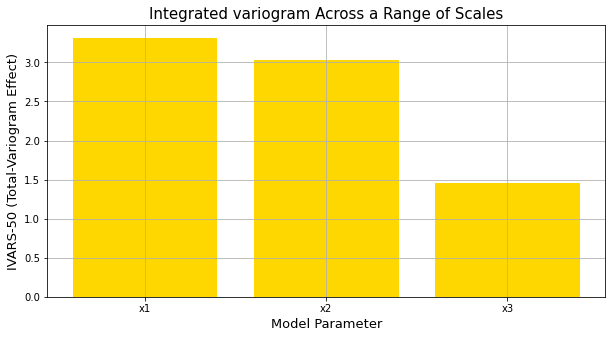

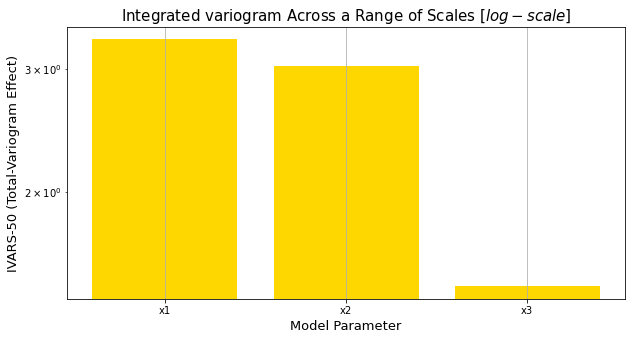

In [14]:
# Plot IVARS from Experiment 1
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_1.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')


In [15]:
# Run the rest of Experiment 2

experiment_2.run_offline(Ex2_modelframe)

building pairs:   0%|                                                                          | 0/300 [00:00<…

calculating 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

binning and reording pairs based on 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

VARS analysis:   0%|                                                                            | 0/10 [00:00<…

factor ranking:   0%|                                                                            | 0/2 [00:00<…

bootstrapping and grouping:   0%|                                                              | 0/100 [00:00<…

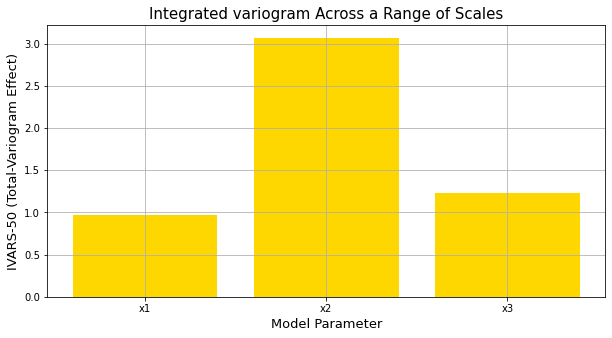

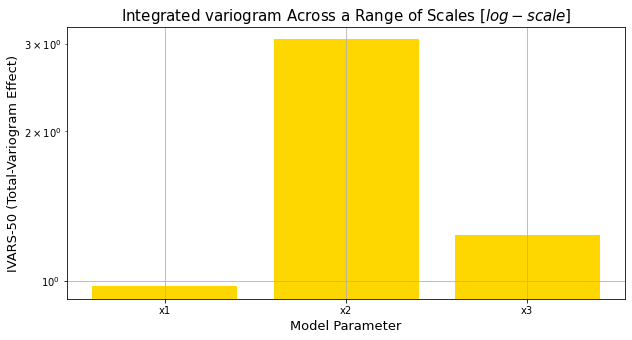

In [16]:
# Plot IVARS from Experiment 2
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_2.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

### Appendix: An example of Step 2 above

The cells below run the Ishigami function semi-externally for demonstration purposes only. For real external models, the users have to figure out how to run their models for different inputs.

In [7]:
def ishigami(x, a=7, b=0.1):
    '''Ishigami test function'''
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 3:
        raise ValueError('`x` must have only three arguments at a time')
    
    return np.sin(x[0]) + a*(np.sin(x[1])**2) + b*(x[2]**4)*np.sin(x[0])

In [8]:
from varstool import Model
ishigami_model = Model(ishigami)

In [9]:
# Run Ishigami for Experiment 1
# **** you do not need to understand this block of code ****
applied_df = Ex1_star_points.merge(Ex1_star_points.drop_duplicates()
                     .assign(**{'external model': lambda x: x.apply(ishigami, axis=1)}), 
                     how='left')
applied_df.index = Ex1_star_points.index
applied_df.to_csv('5a - Ex1_star_points_with_outputs.csv')

In [10]:
# Run Ishigami for Experiment 2
# **** you do not need to understand this block of code ****
applied_df = Ex2_star_points.merge(Ex2_star_points.drop_duplicates()
                     .assign(**{'external model': lambda x: x.apply(ishigami, axis=1)}), 
                     how='left')
applied_df.index = Ex2_star_points.index
applied_df.to_csv('5a - Ex2_star_points_with_outputs.csv')

All done!